In [1]:
from classifier import *
from gan import *
from synthetic_data_generation import *

D:\Ognjenov Folder\Fx\Master\ML\GAN-Based-Image-Data-Augmentation\synthetic_data_generation.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gan: GAN = torch.load(model_

Generated 1000 images with label 0.
Generated 1000 images with label 1.
Generated 1000 images with label 2.
Generated 1000 images with label 3.
Generated 1000 images with label 4.
Generated 1000 images with label 5.
Generated 1000 images with label 6.
Generated 1000 images with label 7.
Generated 1000 images with label 8.
Generated 1000 images with label 9.


D:\Ognjenov Folder\Fx\Master\ML\GAN-Based-Image-Data-Augmentation\classifier.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  train_data = torch.tensor(train_data, dtype=torch.float32).to(self.device)


Epoch [10/100], Loss: 0.7359
Test Accuracy: 92.05%
F1 Score: 0.9202
Precision: 0.9239
Recall: 0.9205

Classification Report:
               precision    recall  f1-score   support

           0     0.9490    0.9688    0.9588       192
           1     0.7982    0.9944    0.8856       179
           2     0.9507    0.9104    0.9301       212
           3     0.8773    0.9019    0.8894       214
           4     0.9109    0.9388    0.9246       196
           5     0.9329    0.7574    0.8361       202
           6     0.9665    0.9439    0.9551       214
           7     0.9375    0.9091    0.9231       198
           8     0.9479    0.9579    0.9529       190
           9     0.9548    0.9360    0.9453       203

    accuracy                         0.9205      2000
   macro avg     0.9226    0.9218    0.9201      2000
weighted avg     0.9239    0.9205    0.9202      2000

Epoch [20/100], Loss: 0.2280
Test Accuracy: 95.65%
F1 Score: 0.9564
Precision: 0.9566
Recall: 0.9565

Classificatio

Test Accuracy: 76.49%
F1 Score: 0.7727
Precision: 0.8411
Recall: 0.7649

Classification Report:
               precision    recall  f1-score   support

           0     0.9077    0.9531    0.9298       980
           1     0.9944    0.6247    0.7673      1135
           2     0.7748    0.8566    0.8136      1032
           3     0.7766    0.8673    0.8195      1010
           4     0.7824    0.8717    0.8247       982
           5     0.9487    0.5392    0.6876       892
           6     0.9758    0.7150    0.8253       958
           7     0.9221    0.8171    0.8664      1028
           8     0.4045    0.9374    0.5652       974
           9     0.9093    0.4668    0.6169      1009

    accuracy                         0.7649     10000
   macro avg     0.8396    0.7649    0.7716     10000
weighted avg     0.8411    0.7649    0.7727     10000



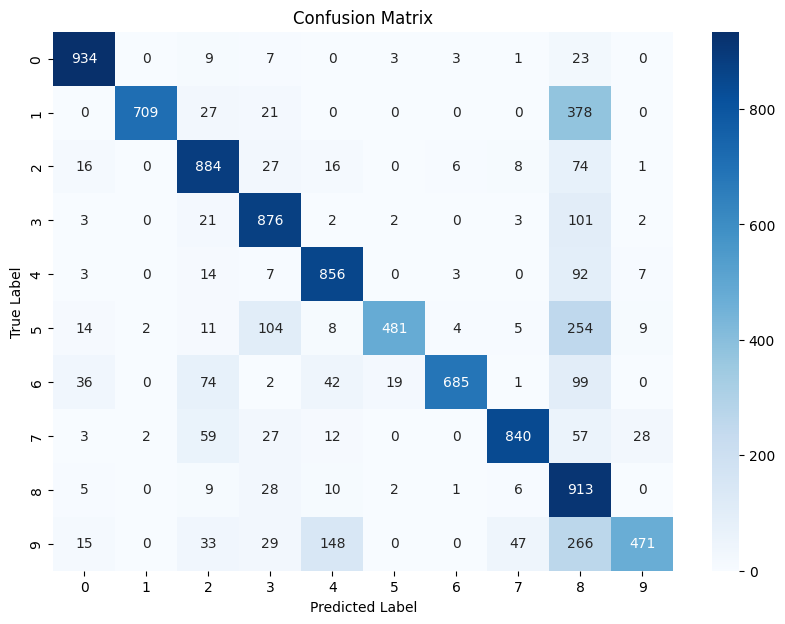

In [2]:
images, labels = generate_synthetic_data()

mnist_classifier = MNISTClassifier(lr=0.001, input_dim=784, output_dim=10, hidden_dim=300, dropout_rate=0.1)
train_loader, validation_loader, test_loader = mnist_classifier.load_and_preprocess_data(validation_split=0.2)
train_loader, validation_loader, test_loader = mnist_classifier.load_and_preprocess_data(train_data=images, train_labels=labels, validation_split=0.2)
mnist_classifier.train_model(train_loader=train_loader, validation_loader=validation_loader, num_epochs=100)

torch.save(mnist_classifier, 'saved_models/classifier.pth')

true_labels, pred_labels = mnist_classifier.evaluate_model(test_loader)
mnist_classifier.plot_confusion_matrix(true_labels, pred_labels)